# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [23]:
import pandas as pd

import numpy as np

# Importando a biblioteca warnings para ignorar avisos durante a execução do código
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler

In [24]:
# Lendo o arquivo
df = pd.read_excel('customer_supermarket.xlsx')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,2020-09-04,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,...,5,0,0,0,0,0,0,3,11,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Days_Registered      2240 non-null   int64         
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [26]:
# Verificar dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

# Dropar dados ausentes
df.dropna(inplace=True)
df.isnull().sum()

Dados ausentes por coluna:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Days_Registered         0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Days_Registered        0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [27]:
numerical_df = df.select_dtypes(include='number')

In [29]:
outliers_count = {}
iqr_multiplier = 1.5  # Multiplicador do IQR para definir os limites de outliers
zscore_threshold = 3  # Limite de Z-score para definir outliers

for column in numerical_df.columns:
    # Contagem de outliers usando o método do IQR
    q1 = numerical_df[column].quantile(0.25)
    q3 = numerical_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold_iqr = q1 - iqr_multiplier * iqr
    upper_threshold_iqr = q3 + iqr_multiplier * iqr
    outliers_iqr = numerical_df[(numerical_df[column] < lower_threshold_iqr) | (numerical_df[column] > upper_threshold_iqr)]
    
    # Contagem de outliers usando o método do Z-score
    mean = numerical_df[column].mean()
    std = numerical_df[column].std()
    lower_threshold_zscore = mean - zscore_threshold * std
    upper_threshold_zscore = mean + zscore_threshold * std
    outliers_zscore = numerical_df[(numerical_df[column] < lower_threshold_zscore) | (numerical_df[column] > upper_threshold_zscore)]
    
    outliers_count[column] = {'IQR': outliers_iqr.shape[0], 'Z-score': outliers_zscore.shape[0]}

outliers_df = pd.DataFrame(outliers_count).transpose()
print(outliers_df)


                     IQR  Z-score
ID                     0        0
Year_Birth             3        3
Income                 8        8
Kidhome                0        0
Teenhome               0        0
Days_Registered        0        0
Recency                0        0
MntWines              35       15
MntFruits            246       64
MntMeatProducts      174       39
MntFishProducts      222       58
MntSweetProducts     246       61
MntGoldProds         205       46
NumDealsPurchases     84       31
NumWebPurchases        3        3
NumCatalogPurchases   23        4
NumStorePurchases      0        0
NumWebVisitsMonth      8        9
AcceptedCmp3         163      163
AcceptedCmp4         164      164
AcceptedCmp5         162      162
AcceptedCmp1         142      142
AcceptedCmp2          30       30
Complain              21       21
Z_CostContact          0        0
Z_Revenue              0        0
Response             333        0


In [30]:
# Criar uma instância do StandardScaler
scaler = RobustScaler()

alpha = 0.02  # Definir o nível de significância desejado

outliers_count = {}

for column in numerical_df.columns:
    # Contagem de outliers usando o método do IQR
    q1 = numerical_df[column].quantile(0.25)
    q3 = numerical_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold_iqr = q1 - iqr_multiplier * iqr
    upper_threshold_iqr = q3 + iqr_multiplier * iqr
    outliers_iqr = numerical_df[(numerical_df[column] < lower_threshold_iqr) | (numerical_df[column] > upper_threshold_iqr)]
    
    # Contagem de outliers usando o método do Z-score
    mean = numerical_df[column].mean()
    std = numerical_df[column].std()
    lower_threshold_zscore = mean - zscore_threshold * std
    upper_threshold_zscore = mean + zscore_threshold * std
    outliers_zscore = numerical_df[(numerical_df[column] < lower_threshold_zscore) | (numerical_df[column] > upper_threshold_zscore)]
    

    # Padronizar os dados
    dados_padronizados = scaler.fit_transform(numerical_df)

    # Criar um novo DataFrame com os dados padronizados
    df_padronizado = pd.DataFrame(dados_padronizados, columns=numerical_df.columns)

    # Contagem de outliers usando o método Isolation Forest
    isolation_forest = IsolationForest(contamination=alpha)
    isolation_forest.fit(df_padronizado[[column]])
    outliers_isolation_forest = isolation_forest.predict(df_padronizado[[column]])
    outliers_isolation_forest = numerical_df[outliers_isolation_forest == -1]

    # Apply DBSCAN to cluster the data and find outliers
    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan.fit(df_padronizado[[column]])
    outliers_DBSCAN = dbscan.labels_
    #outliers_DBSCAN = dbscan.predict(numerical_df[[column]])
    outliers_DBSCAN = numerical_df[outliers_DBSCAN == -1]
    
    outliers_count[column] = {'IQR': outliers_iqr.shape[0], 'Z-score': outliers_zscore.shape[0],
                               'Isolation Forest': outliers_isolation_forest.shape[0], 'DBSCAN': outliers_DBSCAN.shape[0]}

outliers_df = pd.DataFrame(outliers_count).transpose()
print(outliers_df)

                     IQR  Z-score  Isolation Forest  DBSCAN
ID                     0        0                45       0
Year_Birth             3        3                39       3
Income                 8        8                45       2
Kidhome                0        0                 0       0
Teenhome               0        0                 0       0
Days_Registered        0        0                42       0
Recency                0        0                45       0
MntWines              35       15                45       0
MntFruits            246       64                45       0
MntMeatProducts      174       39                45       4
MntFishProducts      222       58                45       0
MntSweetProducts     246       61                42       1
MntGoldProds         205       46                45       3
NumDealsPurchases     84       31                45       6
NumWebPurchases        3        3                 3       3
NumCatalogPurchases   23        4       

In [32]:
# Dropar outliers
numerical_df = df.select_dtypes(include=np.number).columns

# Verificar outliers usando o método IQR Score
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [33]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 1 to 2238
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1182 non-null   int64         
 1   Year_Birth           1182 non-null   int64         
 2   Education            1182 non-null   object        
 3   Marital_Status       1182 non-null   object        
 4   Income               1182 non-null   float64       
 5   Kidhome              1182 non-null   int64         
 6   Teenhome             1182 non-null   int64         
 7   Dt_Customer          1182 non-null   datetime64[ns]
 8   Days_Registered      1182 non-null   int64         
 9   Recency              1182 non-null   int64         
 10  MntWines             1182 non-null   int64         
 11  MntFruits            1182 non-null   int64         
 12  MntMeatProducts      1182 non-null   int64         
 13  MntFishProducts      1182 non-nul

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [35]:
df_no_outliers['MntTotal'] = df_no_outliers[['MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)

### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [36]:
df_selected = df_no_outliers.loc[:, ['Recency', 'Days_Registered', 'MntTotal', 'Income']]

### Atividade 5: Padronize os dados.

In [37]:
scaler = StandardScaler()
df_selected_padronizado = scaler.fit_transform(df_selected)

### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

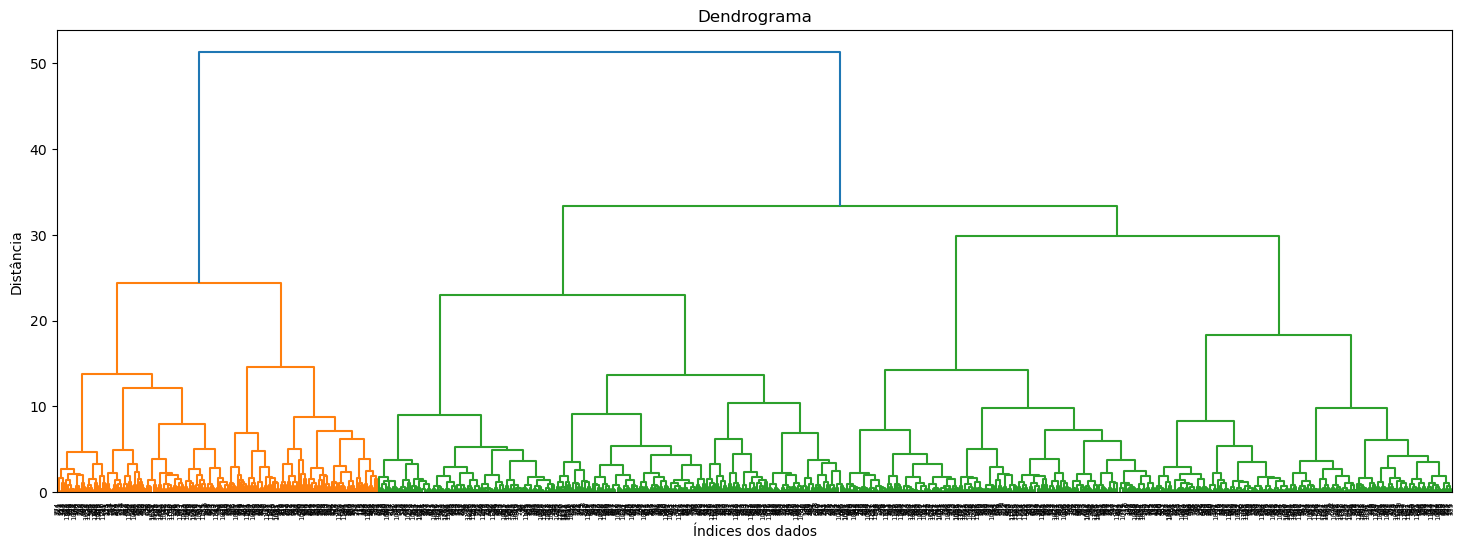

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar o agrupamento hierárquico
Z = linkage(df_selected_padronizado, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(18, 6))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices dos dados')
plt.ylabel('Distância')
plt.show()


In [39]:
# seu código

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [40]:
from scipy.cluster.hierarchy import fcluster

# Definir o número de grupos
num_grupos = 4

# Obter os rótulos de grupos com base no número de grupos escolhido
rotulos_grupos = fcluster(Z, num_grupos, criterion='maxclust')

# Adicionar a coluna 'grupos' ao dataframe original
df_selected['grupos'] = rotulos_grupos


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

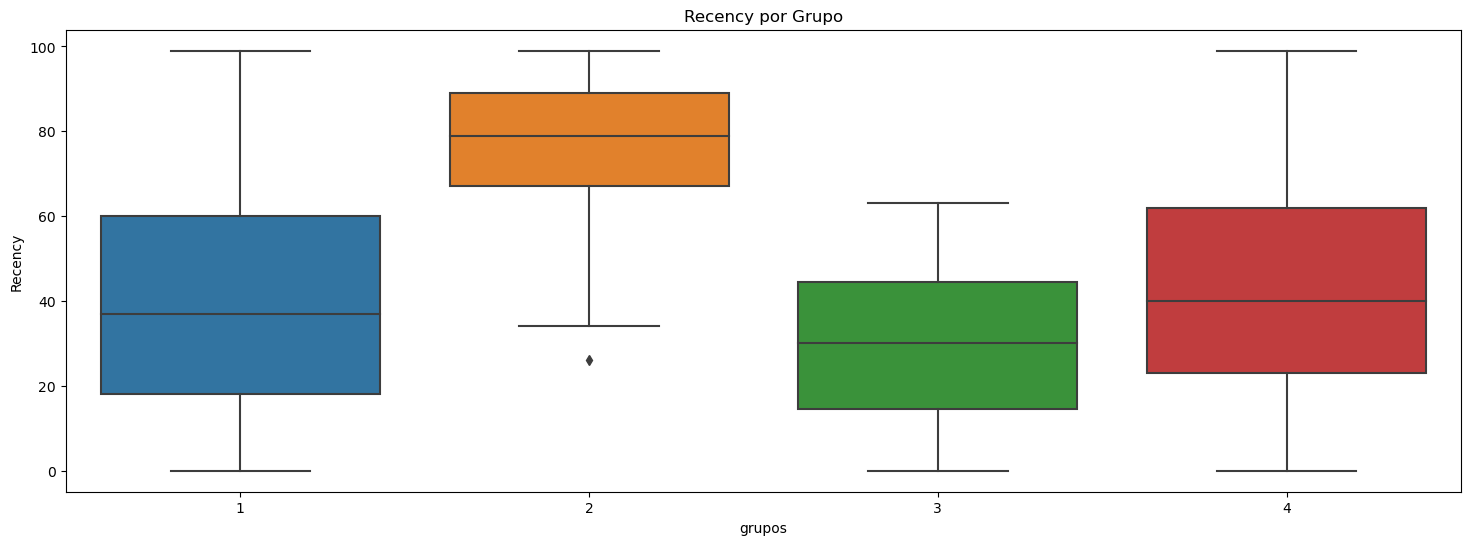

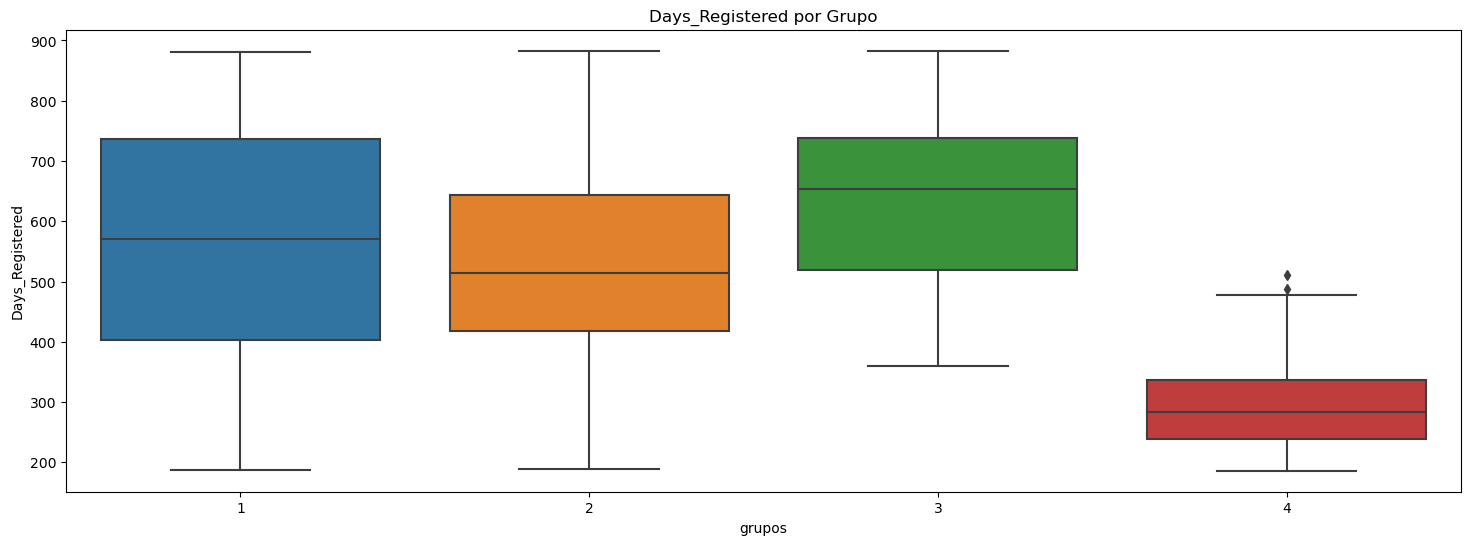

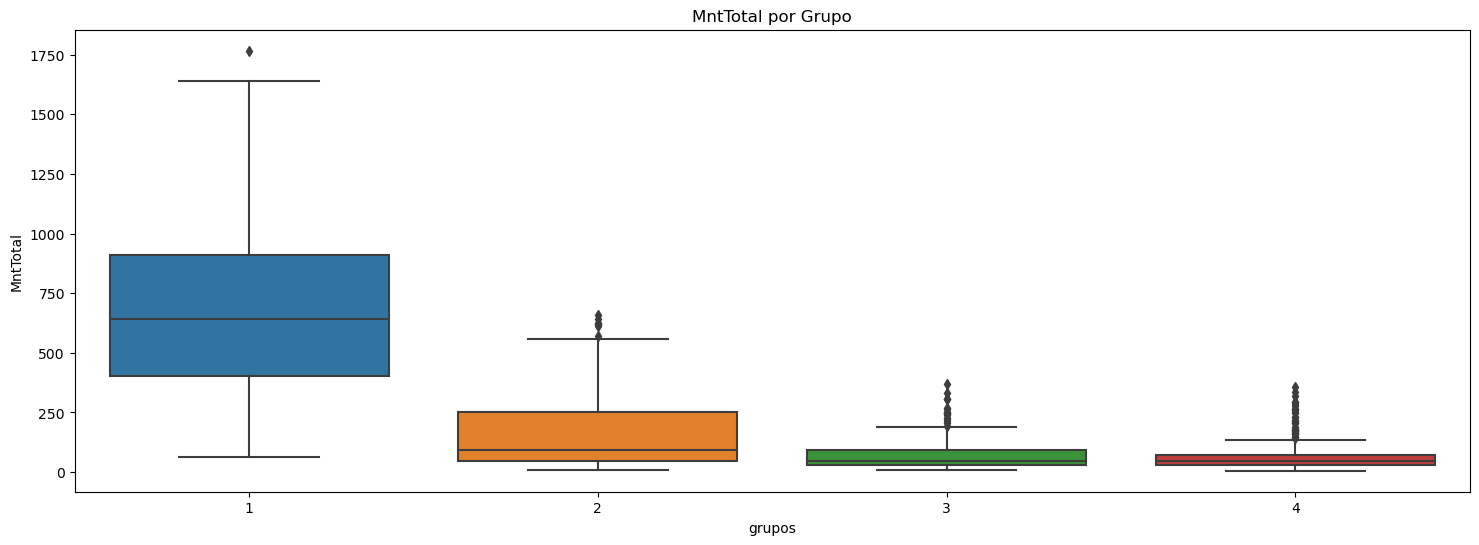

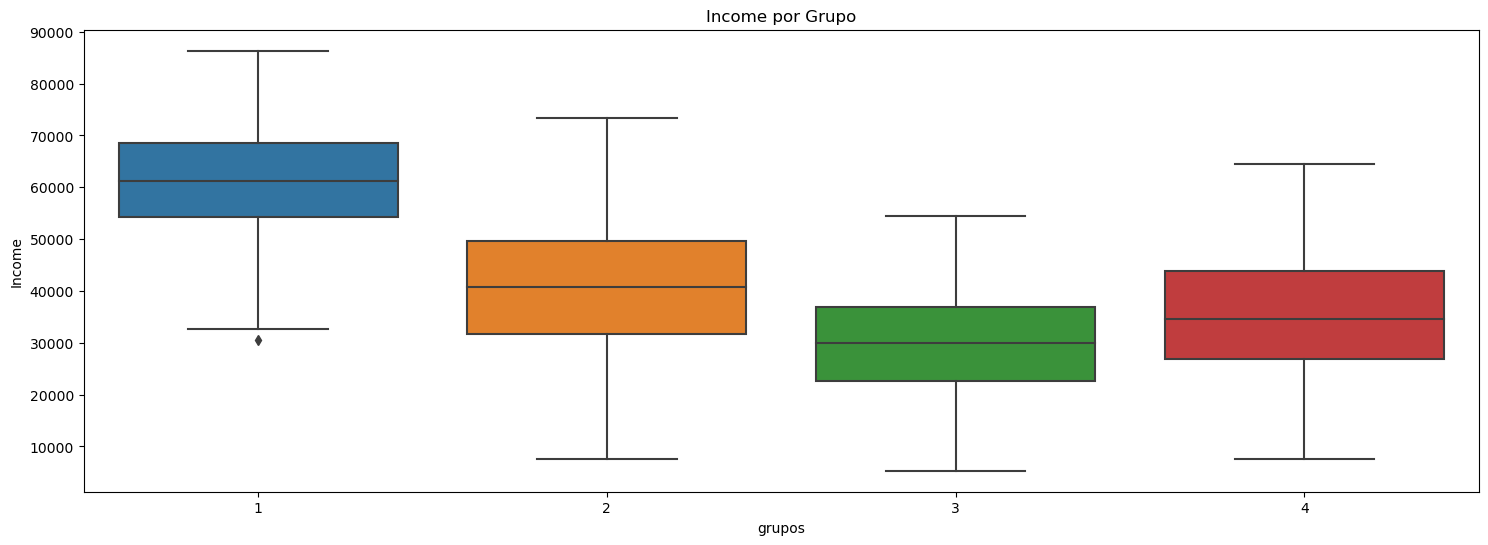

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar boxplots para cada variável em relação aos grupos
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Recency')
plt.title('Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Days_Registered')
plt.title('Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='MntTotal')
plt.title('MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Income')
plt.title('Income por Grupo')
plt.show()

In [42]:
# seu código

In [43]:
# seu código

In [44]:
# seu código

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

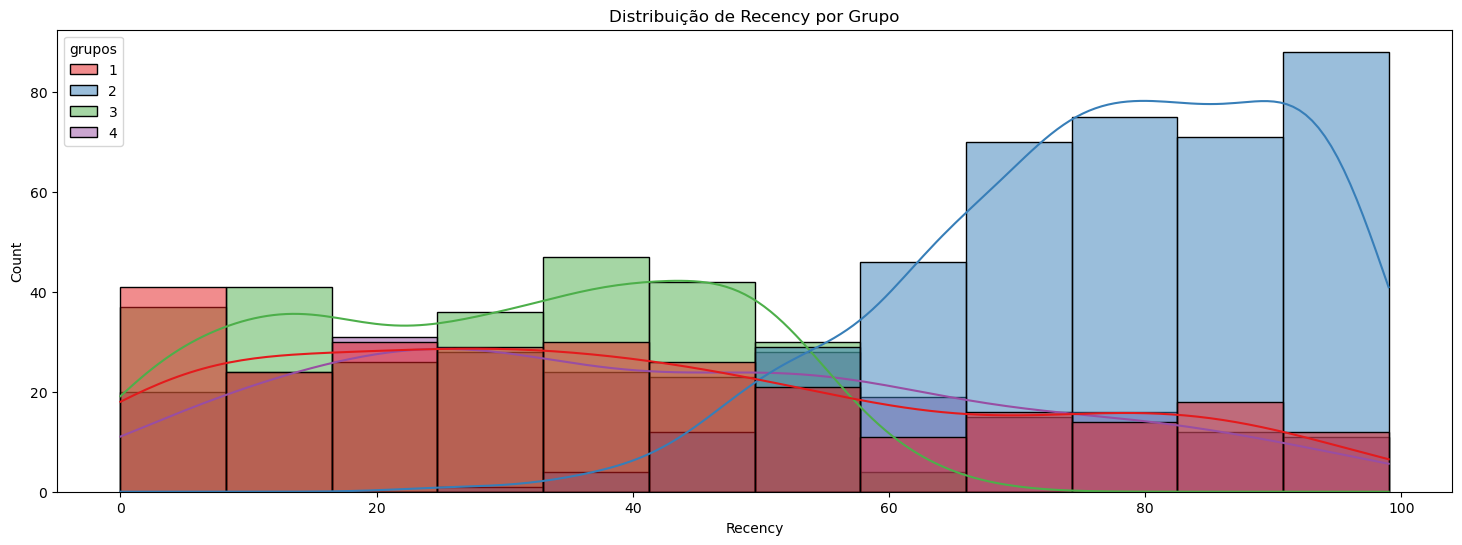

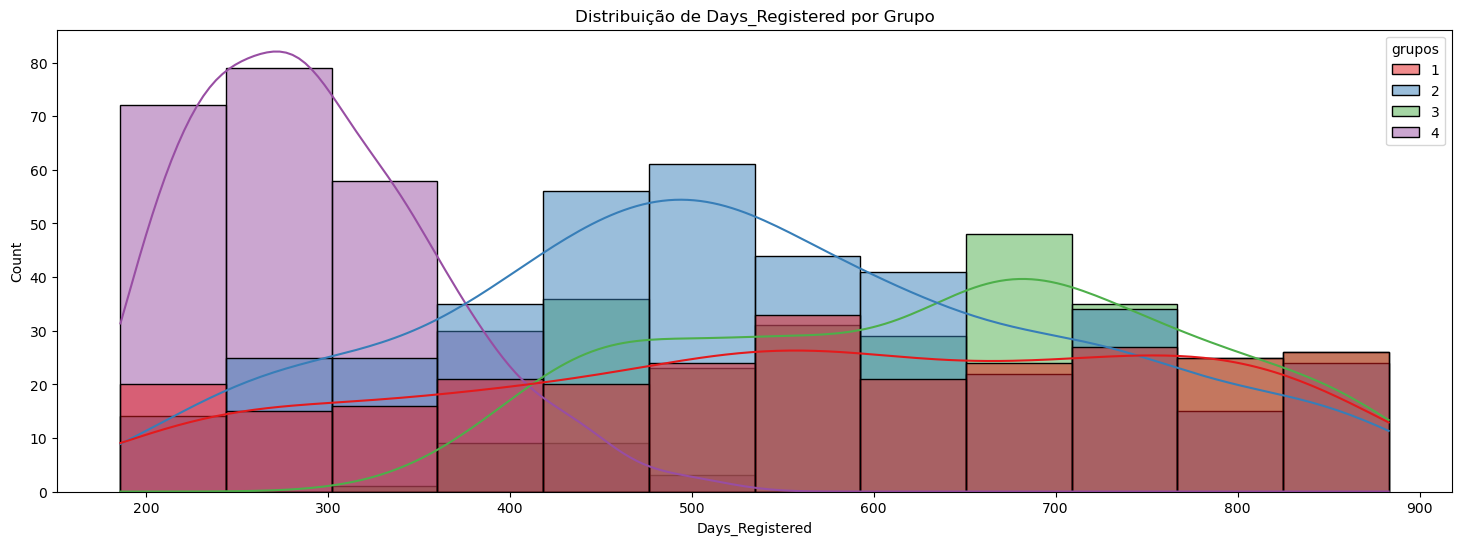

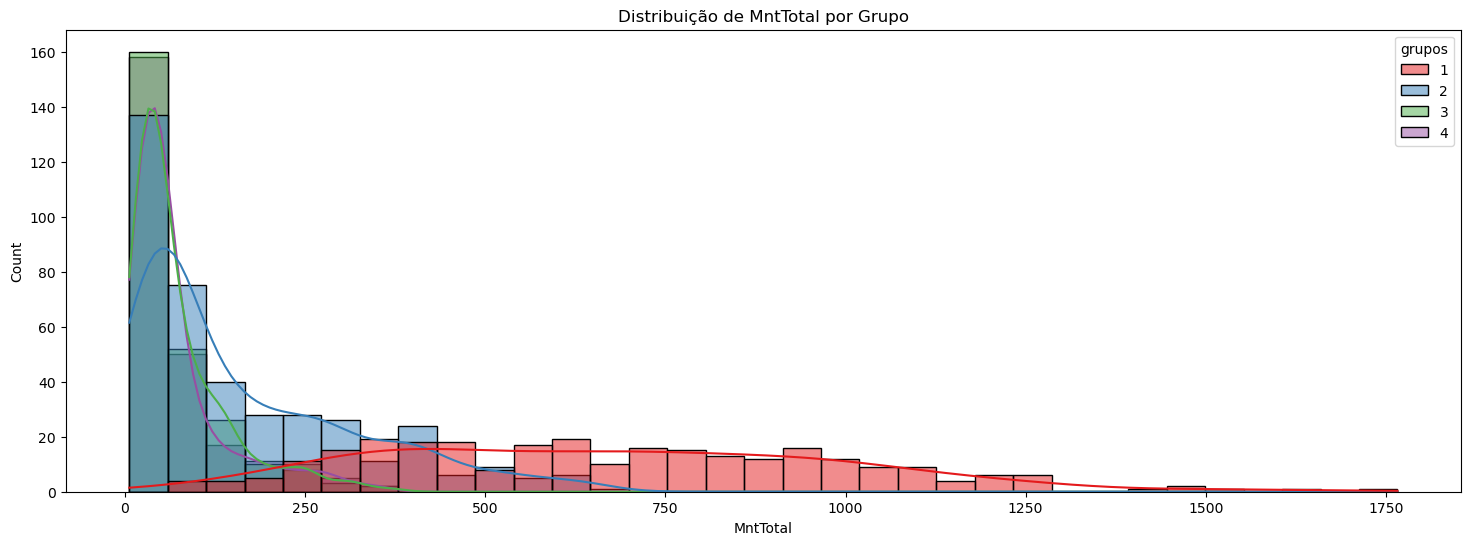

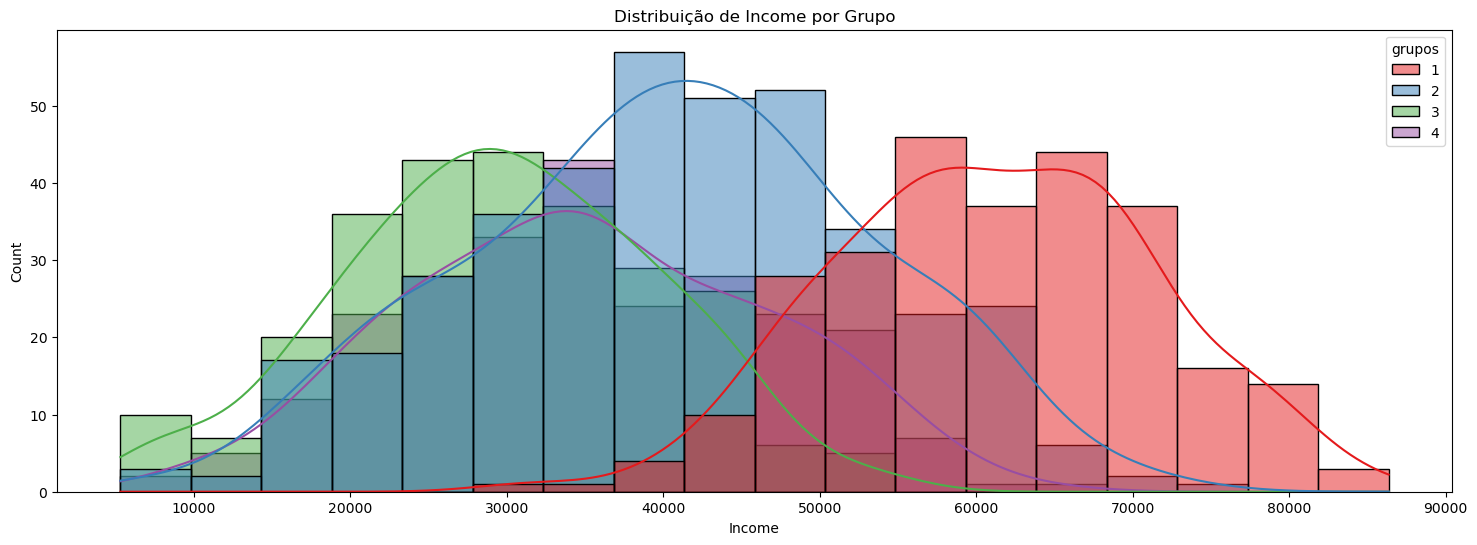

In [45]:
# Criar histogramas para cada variável em relação aos grupos
plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Recency', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Days_Registered', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='MntTotal', hue='grupos', kde=True , palette='Set1')
plt.title('Distribuição de MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Income', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Income por Grupo')
plt.show()


In [46]:
# seu código

In [47]:
# seu código

In [48]:
# seu código

In [49]:
# seu código

In [50]:
# seu código

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

In [51]:
grouped_df = df_selected.groupby('grupos')

for group, data in grouped_df:
    print(f"Grupo {group}:")
    print(data.describe())
    print()

Grupo 1:
          Recency  Days_Registered   MntTotal        Income  grupos
count  272.000000       272.000000   272.0000    272.000000   272.0
mean    40.213235       563.338235   672.9375  61158.334559     1.0
std     27.773440       195.064365   322.1017  10113.315127     0.0
min      0.000000       187.000000    65.0000  30538.000000     1.0
25%     18.000000       403.500000   403.5000  54207.000000     1.0
50%     37.000000       570.000000   642.5000  61286.000000     1.0
75%     60.000000       737.250000   908.5000  68634.500000     1.0
max     99.000000       881.000000  1766.0000  86358.000000     1.0

Grupo 2:
          Recency  Days_Registered    MntTotal        Income  grupos
count  396.000000       396.000000  396.000000    396.000000   396.0
mean    76.957071       529.431818  163.113636  40579.747475     2.0
std     14.614218       169.116611  153.259223  12871.580214     0.0
min     26.000000       189.000000    8.000000   7500.000000     2.0
25%     67.000000       

Grupo 1:
Esse grupo é caracterizado por clientes com um baixo valor de Recency, ou seja, eles realizaram compras recentemente. Eles também têm um alto número de Days_Registered, indicando que são clientes que estão cadastrados há mais tempo. Além disso, eles têm um alto valor de MntTotal, o que significa que gastam uma quantia considerável em todas as categorias de produtos. A renda anual (Income) desses clientes também é alta. Esse grupo pode ser descrito como clientes fiéis e de alto valor, que realizam compras com frequência, têm um histórico de relacionamento longo com a empresa e possuem um bom poder aquisitivo.

Grupo 2:
Esse grupo é composto por clientes com um valor moderado de Recency, indicando que fizeram compras relativamente recentemente. O número de Days_Registered é variado, mas em geral, os clientes têm um registro de médio a longo prazo. O valor total de gastos (MntTotal) é mais baixo em comparação com outros grupos, indicando que esses clientes gastam menos nas diferentes categorias de produtos. A renda anual (Income) desses clientes também é mais baixa em relação aos outros grupos. Esse grupo pode ser descrito como clientes regulares, que realizam compras com menor frequência e têm um poder aquisitivo moderado.

Grupo 3:
Esse grupo é caracterizado por clientes com um valor moderado de Recency, indicando compras relativamente recentes. O número de Days_Registered é variado, o que significa que eles podem ser clientes recentes ou com um histórico de relacionamento mais longo. O valor total de gastos (MntTotal) é baixo, sugerindo que esses clientes têm um menor envolvimento em todas as categorias de produtos. A renda anual (Income) desses clientes também é mais baixa em comparação com os outros grupos. Esse grupo pode ser descrito como clientes ocasionais, que realizam compras esporádicas e têm um poder aquisitivo mais limitado.

Grupo 4:
Esse grupo é composto por clientes com um valor alto de Recency, indicando que não fizeram compras recentemente. O número de Days_Registered é variado, o que significa que podem ser clientes recentes ou com um histórico de relacionamento mais longo. O valor total de gastos (MntTotal) é baixo, indicando que esses clientes têm um menor envolvimento em todas as categorias de produtos. A renda anual (Income) desses clientes também é mais baixa em relação aos outros grupos. Esse grupo pode ser descrito como clientes inativos, que não realizam compras com frequência e têm um poder aquisitivo mais limitado.

### Para refletir: 


#### Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

#### Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding

In [52]:
# Criar nova coluna "Gasto_Renda"
df_selected['Gasto_Renda'] = df_selected['MntTotal'] / df_selected['Income']

In [53]:
scaler = StandardScaler()
df_selected_padronizado = scaler.fit_transform(df_selected)

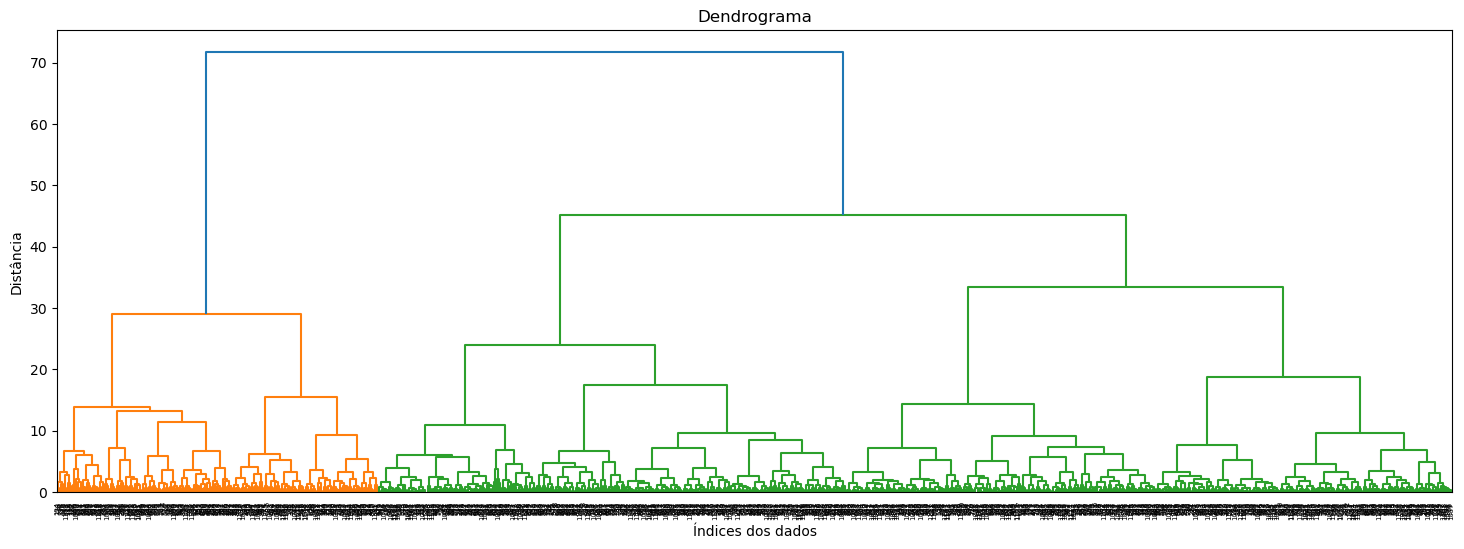

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar o agrupamento hierárquico
Z = linkage(df_selected_padronizado, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(18, 6))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices dos dados')
plt.ylabel('Distância')
plt.show()

In [55]:
from scipy.cluster.hierarchy import fcluster

# Definir o número de grupos
num_grupos = 4

# Obter os rótulos de grupos com base no número de grupos escolhido
rotulos_grupos = fcluster(Z, num_grupos, criterion='maxclust')

# Adicionar a coluna 'grupos' ao dataframe original
df_selected['grupos'] = rotulos_grupos

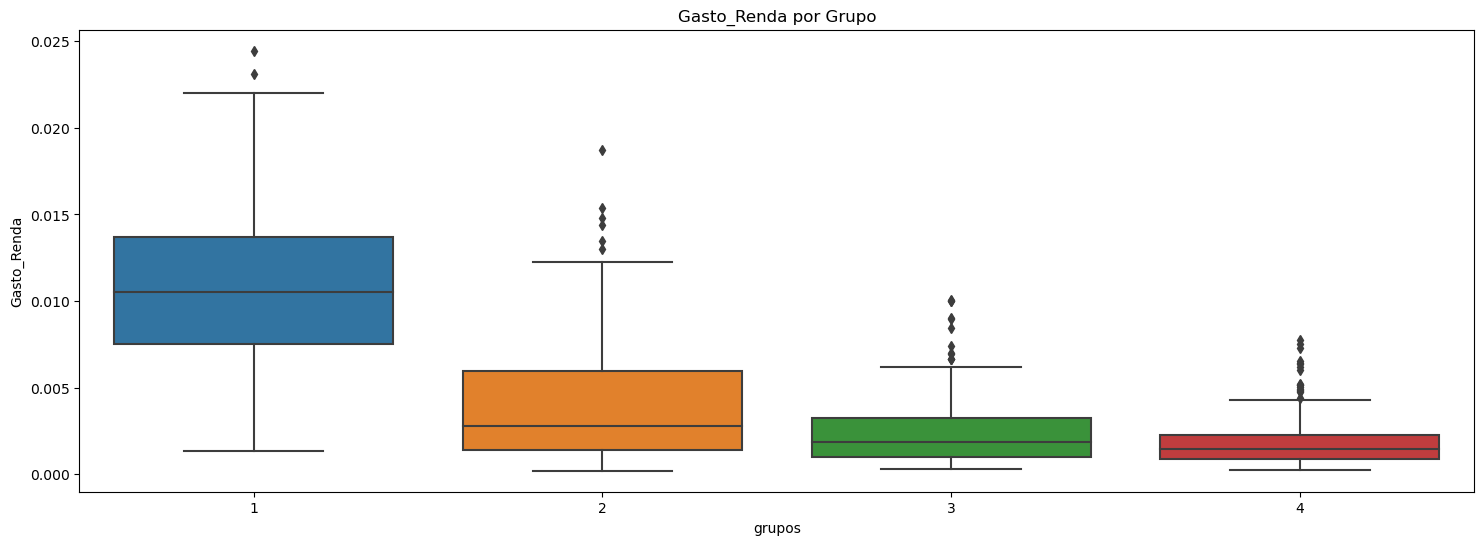

In [56]:
# Criar boxplots para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Recency')
plt.title('Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Days_Registered')
plt.title('Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='MntTotal')
plt.title('MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Income')
plt.title('Income por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Gasto_Renda')
plt.title('Gasto_Renda por Grupo')
plt.show()

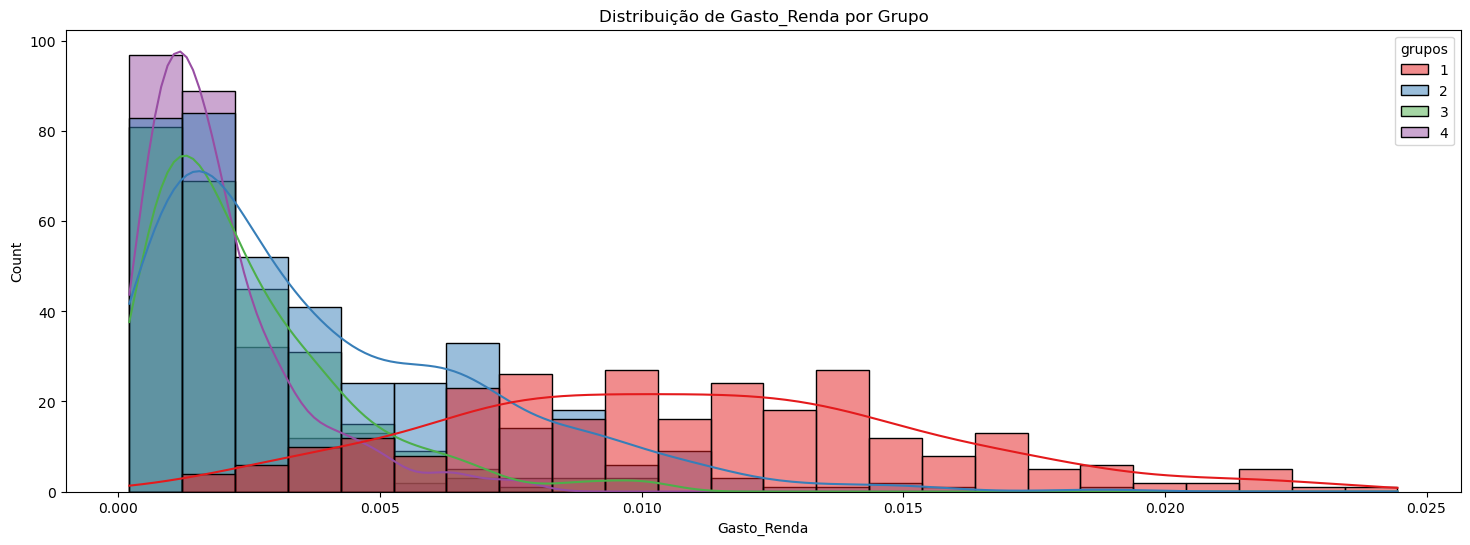

In [57]:
# Criar histogramas para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Recency', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Days_Registered', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='MntTotal', hue='grupos', kde=True , palette='Set1')
plt.title('Distribuição de MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Income', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Income por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Gasto_Renda', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Gasto_Renda por Grupo')
plt.show()

In [58]:
grouped_df = df_selected.groupby('grupos')

for group, data in grouped_df:
    print(f"Grupo {group}:")
    print(data.describe())
    print()

Grupo 1:
          Recency  Days_Registered   MntTotal        Income  grupos  \
count  272.000000       272.000000   272.0000    272.000000   272.0   
mean    40.213235       563.338235   672.9375  61158.334559     1.0   
std     27.773440       195.064365   322.1017  10113.315127     0.0   
min      0.000000       187.000000    65.0000  30538.000000     1.0   
25%     18.000000       403.500000   403.5000  54207.000000     1.0   
50%     37.000000       570.000000   642.5000  61286.000000     1.0   
75%     60.000000       737.250000   908.5000  68634.500000     1.0   
max     99.000000       881.000000  1766.0000  86358.000000     1.0   

       Gasto_Renda  
count   272.000000  
mean      0.010851  
std       0.004609  
min       0.001327  
25%       0.007533  
50%       0.010516  
75%       0.013720  
max       0.024446  

Grupo 2:
          Recency  Days_Registered    MntTotal        Income  grupos  \
count  397.000000       397.000000  397.000000    397.000000   397.0   
mean    

Uma categorica


In [59]:
df_no_outliers['Education'].value_counts()

Graduation    567
PhD           254
Master        209
2n Cycle      107
Basic          45
Name: Education, dtype: int64

In [60]:
# Criar as variáveis dummy para a coluna 'Education'
education_dummies = pd.get_dummies(df_no_outliers['Education'], prefix='')

# Concatenar as variáveis dummy ao dataframe df_selected
df_selected = pd.concat([df_selected, education_dummies], axis=1)


In [61]:
df_selected.head()

,Recency,Days_Registered,MntTotal,Income,grupos,Gasto_Renda,_2n Cycle,_Basic,_Graduation,_Master,_PhD
1,38,299,25,46344.0,4,0.000539,0,0,1,0,0
2,26,498,665,71613.0,1,0.009286,0,0,1,0,0
3,26,325,43,26646.0,4,0.001614,0,0,1,0,0
4,94,347,376,58293.0,2,0.006450,0,0,0,0,1
5,16,479,716,62513.0,1,0.011454,0,0,0,1,0


In [62]:
scaler = StandardScaler()
df_selected_padronizado = scaler.fit_transform(df_selected)

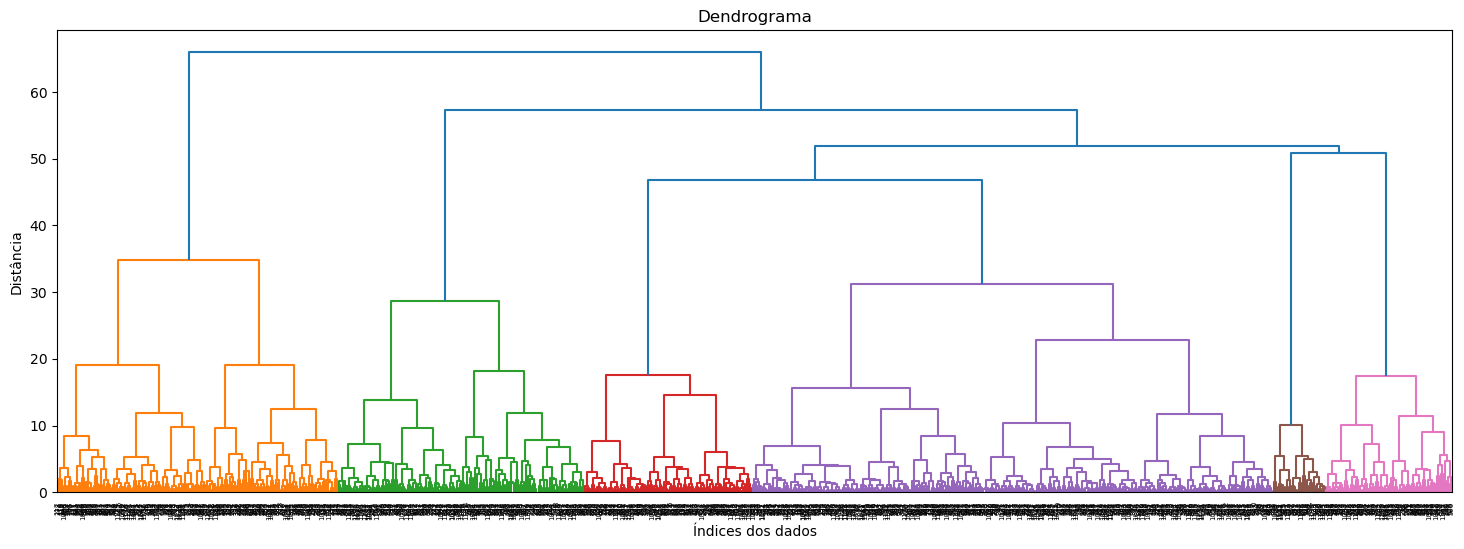

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar o agrupamento hierárquico
Z = linkage(df_selected_padronizado, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(18, 6))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices dos dados')
plt.ylabel('Distância')
plt.show()

In [64]:
from scipy.cluster.hierarchy import fcluster

# Definir o número de grupos
num_grupos = 6

# Obter os rótulos de grupos com base no número de grupos escolhido
rotulos_grupos = fcluster(Z, num_grupos, criterion='maxclust')

# Adicionar a coluna 'grupos' ao dataframe original
df_selected['grupos'] = rotulos_grupos

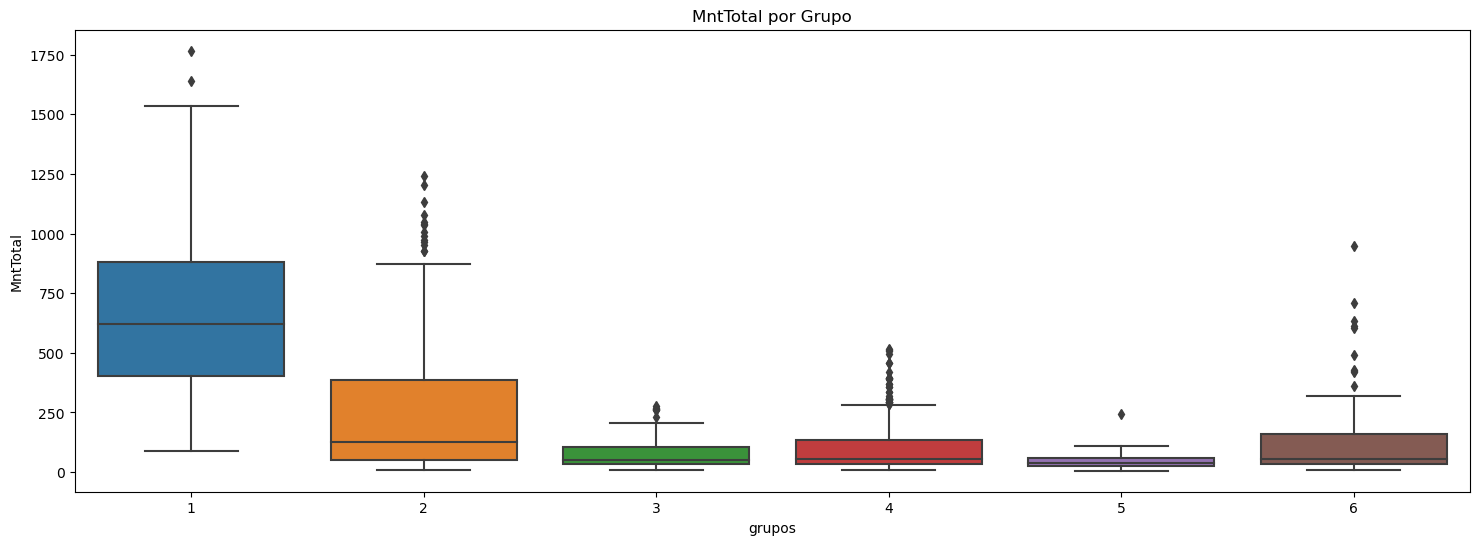

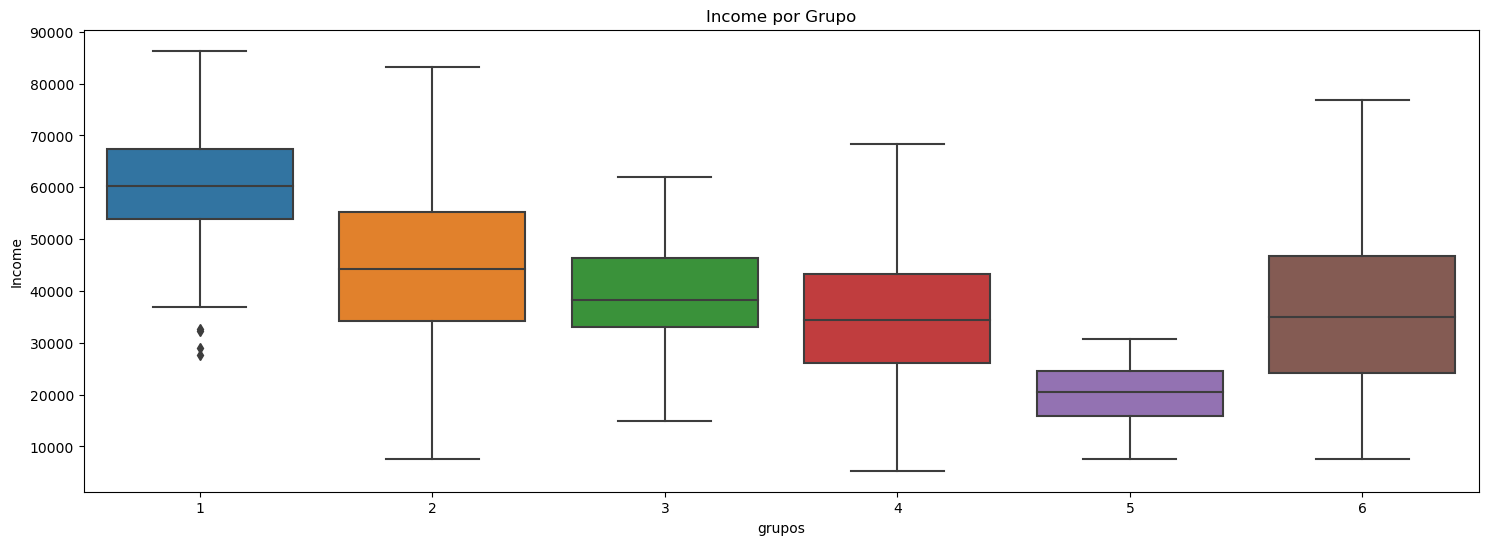

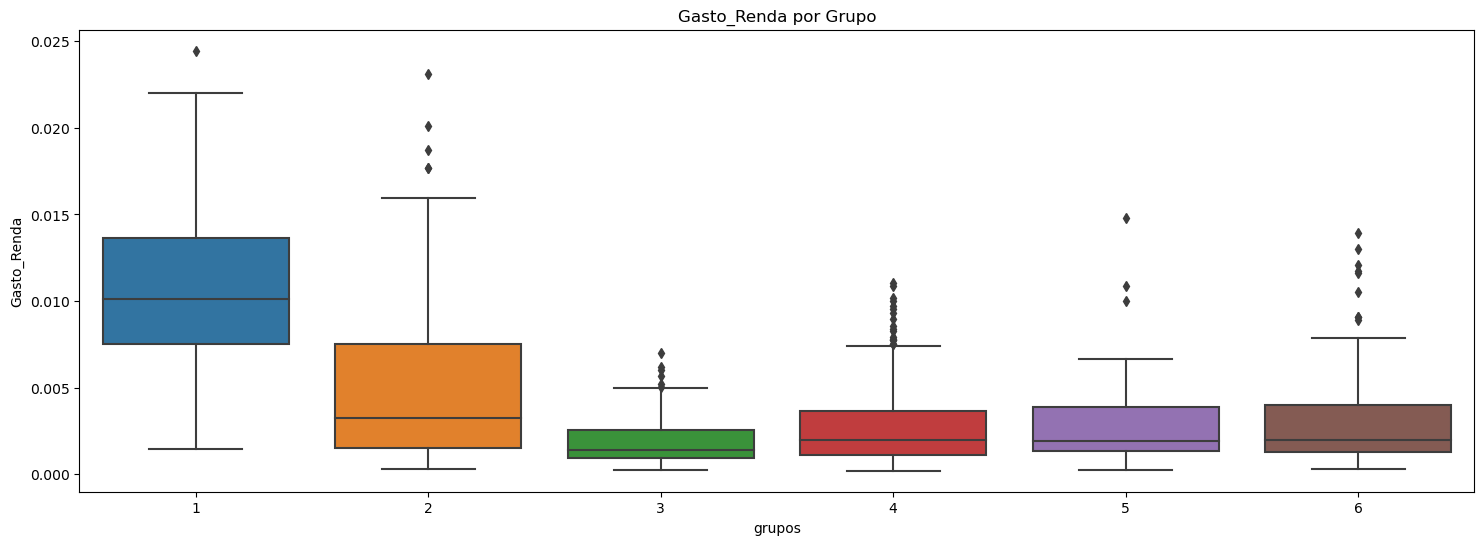

In [65]:
# Criar boxplots para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Recency')
plt.title('Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Days_Registered')
plt.title('Days_Registered por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='MntTotal')
plt.title('MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Income')
plt.title('Income por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Gasto_Renda')
plt.title('Gasto_Renda por Grupo')
plt.show()

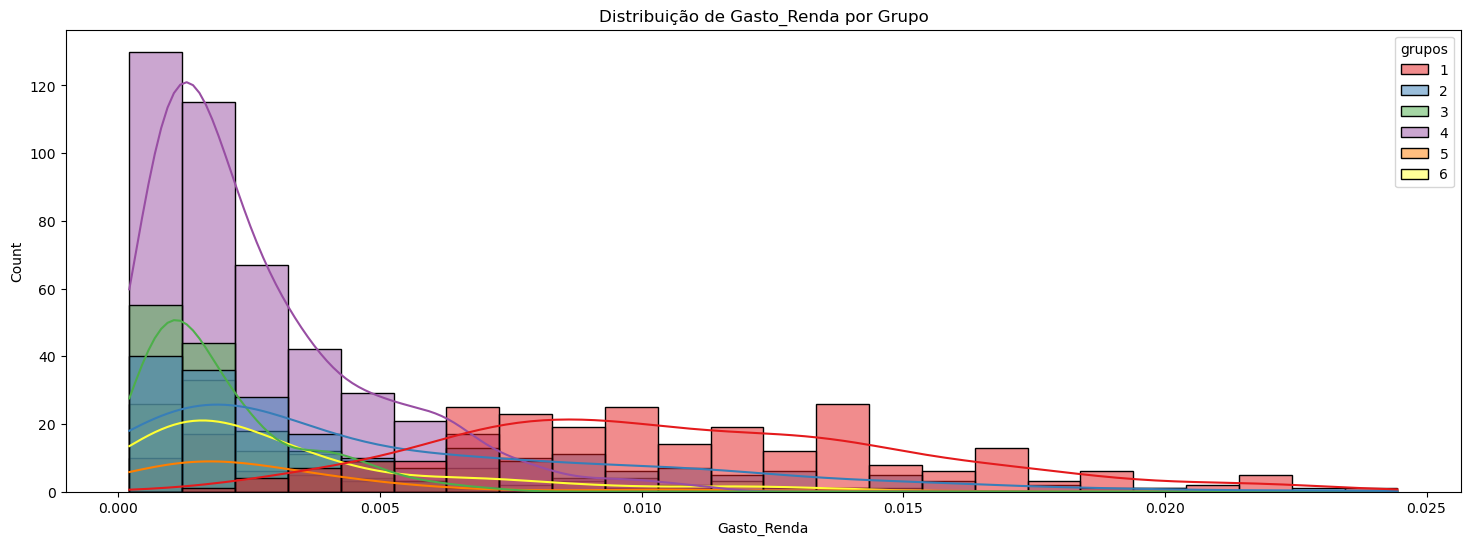

In [66]:
# Criar histogramas para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Recency', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Days_Registered', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='MntTotal', hue='grupos', kde=True , palette='Set1')
plt.title('Distribuição de MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Income', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Income por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Gasto_Renda', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Gasto_Renda por Grupo')
plt.show()

In [67]:
grouped_df = df_selected.groupby('grupos')

for group, data in grouped_df:
    print(f"Grupo {group}:")
    print(data.describe())
    print()

Grupo 1:
          Recency  Days_Registered     MntTotal        Income  grupos  \
count  238.000000       238.000000   238.000000    238.000000   238.0   
mean    45.134454       550.117647   661.504202  60227.449580     1.0   
std     28.322264       192.526996   316.958139  10714.389746     0.0   
min      0.000000       187.000000    87.000000  27683.000000     1.0   
25%     22.000000       406.250000   402.500000  53977.000000     1.0   
50%     43.500000       549.500000   619.000000  60215.000000     1.0   
75%     69.000000       713.500000   879.000000  67442.250000     1.0   
max     99.000000       881.000000  1766.000000  86358.000000     1.0   

       Gasto_Renda  _2n Cycle  _Basic  _Graduation  _Master        _PhD  
count   238.000000      238.0   238.0   238.000000    238.0  238.000000  
mean      0.010834        0.0     0.0     0.529412      0.0    0.470588  
std       0.004428        0.0     0.0     0.500186      0.0    0.500186  
min       0.001453        0.0     0.0

Grupo 1:
- O grupo 1 é composto por pessoas que têm um tempo médio desde a última compra (Recency) de 45 dias.
- A média de dias desde o cadastro (Days_Registered) é de 550 dias.
- O gasto total médio (MntTotal) é de aproximadamente 661.
- A renda média (Income) é de cerca de 60.227.
- A maioria das pessoas nesse grupo possui nível de escolaridade de Graduação (52,9%) e um número significativo possui um diploma de Doutorado (47,1%).
- Esse grupo pode ser caracterizado como consumidores frequentes e com maior poder aquisitivo, que valorizam a qualidade dos produtos e tendem a investir em itens mais caros.

Grupo 2:
- O grupo 2 é composto por pessoas que têm um tempo médio desde a última compra (Recency) de 50 dias.
- A média de dias desde o cadastro (Days_Registered) é de 483 dias.
- O gasto total médio (MntTotal) é de aproximadamente 266.
- A renda média (Income) é de cerca de 44.549.
- Todas as pessoas nesse grupo possuem um diploma de Mestrado.
- Esse grupo pode ser caracterizado como consumidores moderados, com renda média e que tendem a realizar compras com menor frequência, focando em produtos mais acessíveis.

Grupo 3:
- O grupo 3 é composto por pessoas que têm um tempo médio desde a última compra (Recency) de 49 dias.
- A média de dias desde o cadastro (Days_Registered) é de 449 dias.
- O gasto total médio (MntTotal) é de aproximadamente 76.
- A renda média (Income) é de cerca de 39.157.
- Todas as pessoas nesse grupo possuem um diploma de Doutorado.
- Esse grupo pode ser caracterizado como consumidores com menor poder aquisitivo, que realizam compras esporádicas e tendem a gastar menos em comparação aos outros grupos.

Grupo 4:
- O grupo 4 é composto por pessoas que têm um tempo médio desde a última compra (Recency) de 53 dias.
- A média de dias desde o cadastro (Days_Registered) é de 516 dias.
- O gasto total médio (MntTotal) é de aproximadamente 100.
- A renda média (Income) é de cerca de 34.918.
- A maioria das pessoas nesse grupo possui um diploma de Graduação (70,4%).
- Esse grupo pode ser caracterizado como consumidores com renda média-baixa, que tendem a realizar compras menos frequentes e gastar menos em comparação aos outros grupos.

Grupo 5:
- O grupo 5 é composto por pessoas que têm um tempo médio desde a última compra (Recency) de 48 dias.
- A média de dias desde o cadastro (Days_Registered) é de 601 dias.
- O gasto total médio (MntTotal) é de aproximadamente 49.
- A renda média (Income) é de cerca de 20.067.
- Todas as pessoas nesse grupo possuem um diploma de Ensino Básico.
- Esse grupo pode ser caracterizado como consumidores com menor poder aquisitivo, que realizam compras esporádicas e tendem a gastar menos em comparação aos outros grupos.

Grupo 6:
- O grupo 6 é composto por pessoas que têm um tempo médio desde a última compra (Recency) de 53 dias.
- A média de dias desde o cadastro (Days_Registered) é de 494 dias.
- O gasto total médio (MntTotal) é de aproximadamente 127.
- A renda média (Income) é de cerca de 35.536.
- Todas as pessoas nesse grupo possuem um diploma de Ensino Básico.
- Esse grupo pode ser caracterizado como consumidores com menor poder aquisitivo, que realizam compras esporádicas e tendem a gastar menos em comparação aos outros grupos.